# The 100 Box Problem

The objective of this notebook is to code the 100 box problem.

If you are unfamiliar with it, check [Veritasium's awesome video](https://www.youtube.com/watch?v=iSNsgj1OCLA) about it.

In [1]:
# Importing
import random
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Defining number of prisioners
num_prisioners = 100

prisioner_numbers = [i for i in range(num_prisioners)]
box_numbers = [i for i in range(num_prisioners)]
slip_numbers = [i for i in range(num_prisioners)]

## Random Box Checks

Each prisioner checks boxes at random.

In [9]:
# Box process
def random_box_checks(num_prisioners):
    # Creating lists
    prisioner_numbers = [i for i in range(num_prisioners)]
    box_numbers = [i for i in range(num_prisioners)]
    slip_numbers = [i for i in range(num_prisioners)]
    random.shuffle(slip_numbers)
    
    # Defining auxiliary variables
    max_box_checks = int(num_prisioners / 2)
    numbers_found = []

    # Loop
    for prisioner in prisioner_numbers:
        for check in range(max_box_checks):
            box = random.randrange(num_prisioners)
            slip = slip_numbers[box]
            if slip == prisioner:
                numbers_found.append(prisioner)
    
    # Returning
    return(len(numbers_found))

The maximum number of prisioners escaped at once was 82.
It happened 1 time(s).
All prisioners escaped 0.0% of the time.


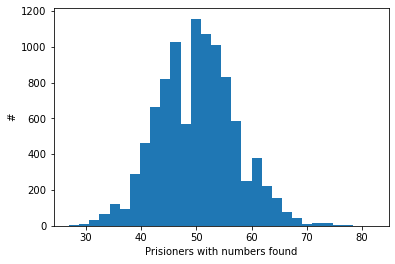

In [10]:
# Running tests
num_iterations = 10**4
num_prisioners_found = []

for iteration in range(num_iterations):
    num_prisioners_found.append(random_box_checks(num_prisioners))

# Number of times all prisioners escaped
## Variables
max_num_prisioners_found = max(num_prisioners_found)
count = Counter(num_prisioners_found)

## Prints
print(f"The maximum number of prisioners escaped at once was {max_num_prisioners_found}.")
print(f"It happened {count[max_num_prisioners_found]} time(s).")
print(f"All prisioners escaped {round(100*count[num_prisioners] / num_iterations, 1)}% of the time.")

# Plotting
plt.hist(num_prisioners_found, density=False, bins=30)
plt.ylabel('#')
plt.xlabel('Prisioners with numbers found');

## Loop Box Checks

Instead of picking at random, each prisioner starts at the box with their own number and follows the slip of each box.

In [5]:
# Box process
def loop_box_checks(num_prisioners):
    # Defining lists
    prisioner_numbers = [i for i in range(num_prisioners)]
    box_numbers = [i for i in range(num_prisioners)]
    slip_numbers = [i for i in range(num_prisioners)]
    random.shuffle(slip_numbers)
    
    # Defining auxiliary variables
    max_box_checks = int(num_prisioners / 2)
    numbers_found = []

    # Loop
    for prisioner in prisioner_numbers:
        for check in range(max_box_checks):
            box = box_numbers[prisioner] if check == 0 else slip
            slip = slip_numbers[box]
            if slip == prisioner:
                numbers_found.append(prisioner)
                break
    
    # Returning
    return(len(numbers_found))

The maximum number of prisioners escaped at once was 100.
It happened 3089 times.
All prisioners escaped 30.9% of the time!


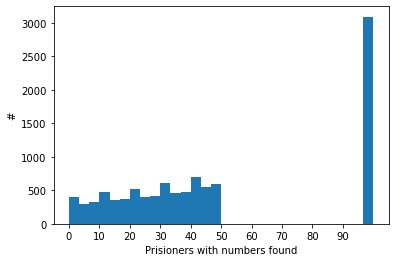

In [6]:
# Running tests
num_iterations_loop = 10**4
num_prisioners_found_loop = []

for iteration in range(num_iterations_loop):
    num_prisioners_found_loop.append(loop_box_checks(num_prisioners))

# Number of times all prisioners escaped
## Variables
max_num_prisioners_found_loop = max(num_prisioners_found_loop)
count_loop = Counter(num_prisioners_found_loop)

## Prints
print(f"The maximum number of prisioners escaped at once was {max_num_prisioners_found_loop}.")
print(f"It happened {count_loop[max_num_prisioners_found_loop]} times.")
print(f"All prisioners escaped {round(100*count_loop[num_prisioners] / num_iterations_loop, 1)}% of the time!")

# Plotting
plt.hist(num_prisioners_found_loop, density=False, bins=30)
plt.ylabel('#')
plt.xlabel('Prisioners with numbers found')
plt.xticks([i for i in range(0, num_prisioners, 10)]);